# **Business Understanding & Objective:**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

> **objective:**
*   predict the possibility that the patient may have a heart failure due to some features.







# **Data Understanding:**

DataSet:

*   there are 918 rows & 12 column.
*   11 features, and column target that is HeartDisease.
*   There are no null values or duplicates.
*   but there are unexpected zeros values in RestingBP & Cholesterol columns.

> **Features :**  
*   **Age :** it is a numerical feature refer to age of patient per [years].
        in range 28 to 77.
*   **Sex :** it is a categorical feature refer to gender of patient.
        Binary values are M for male & F for female.
*   **ChestPainType :** it is a categorical feature refer to chest pain type.
        TA: Typical Angina.
        ATA: Atypical Angina.
        NAP: Non-Anginal Pain.
        ASY: Asymptomatic.
*   **RestingBP:** it is a numerical feature refer to resting blood pressure [mm Hg]
        normal BP is 120/80 mm Hg.
        this values refer to Systolic blood pressure which is 120.
*   **Cholesterol :** it is a numerical feature refer to serum cholesterol [mm/dl]
         normal is less than 200
         200 to 240 above normal
         greater than 240 High
*   **FastingBS :** it is a categorical feature refer to fasting blood sugar
        Binary values
        1 if FastingBS > 120 mg/dl
        0 otherwise
*   **RestingECG:** it is a categorical feature refer to resting electrocardiogram results
        Normal: Normal
        ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria.
*   **MaxHR:** it is a numerical feature refer to maximum heart rate achieved.
        Numeric value between 60 and 202
        Normal Range 60:100
        change max value based on age.
*   **ExerciseAngina:** it is a categorical feature refer to exercise-induced angina
        Binary values are
        Y: Yes
        N: No
*   **Oldpeak:**  it is a numerical feature refer to oldpeak = ST
        Numeric value measured in depression.
        ST depression induced by exercise relative to rest.
*  **ST_Slope:** it is a categorical feature refer to the slope of the peak exercise ST segment
        Up: upsloping : better heart rate with excercise
        Flat: flatsloping : minimal change (typical healthy heart).
        Down: downsloping : signs of unhealthy heart.



> **Label :**
 Target
*   **HeartDisease:** it is a categorical feature refer to Heart Failure
         1: heart disease
         0: Normal









        






# **Importing Libraries**

In [ ]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 90.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=48c3c1b51305c0523eaa308c0aacd57de26d6eec1d9260f27b01de4219c23e8a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer, precision_score, recall_score, f1_score

Mounted at /content/drive


# **Load & show dataset:**

In [ ]:
df_heart = pd.read_csv('/content/drive/MyDrive/DataSets/heart.csv')
print(df_heart.shape)
df_heart.head()

(918, 12)


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [ ]:
ProfileReport(df_heart)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Explore Data**

In [ ]:
df_heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#Describe Numerical Features
df_heart.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

**check unexpected zeros in RestingBP & Cholesterol columns:**

In [ ]:
df_heart[df_heart['RestingBP'] == 0].value_counts().sum()

1

In [ ]:
df_heart[df_heart['Cholesterol'] == 0].value_counts().sum()

172

I will handle those zeros in preprocessing step.

In [ ]:
#catecorical features
df_heart.describe(include = 'O')

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460

Check duplicates

In [ ]:
df_heart.duplicated().sum()

0

there are no duplicate values.

Check Nulls

In [ ]:
df_heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

there are no null values.

check values in all features:

In [ ]:
for col in df_heart.columns:
    print(col)
    print(df_heart[col].value_counts())
    print('___________')

Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64
___________
Sex
M    725
F    193
Name: Sex, dtype: int64
___________
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
___________
RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64
___________
Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222

In [ ]:
# The Relative Frequancy values
for col in df_heart.columns:
    print(col)
    print(df_heart[col].value_counts(normalize=True))
    print('___________')

Age
54    0.055556
58    0.045752
55    0.044662
56    0.041394
57    0.041394
52    0.039216
51    0.038126
59    0.038126
62    0.038126
53    0.035948
60    0.034858
48    0.033769
61    0.033769
63    0.032680
50    0.027233
46    0.026144
41    0.026144
43    0.026144
64    0.023965
65    0.022876
49    0.022876
47    0.020697
44    0.020697
42    0.019608
45    0.019608
38    0.017429
67    0.016340
39    0.016340
66    0.014161
69    0.014161
40    0.014161
35    0.011983
37    0.011983
68    0.010893
34    0.007625
74    0.007625
70    0.007625
36    0.006536
71    0.005447
32    0.005447
72    0.004357
29    0.003268
75    0.003268
33    0.002179
77    0.002179
76    0.002179
31    0.002179
30    0.001089
28    0.001089
73    0.001089
Name: Age, dtype: float64
___________
Sex
M    0.78976
F    0.21024
Name: Sex, dtype: float64
___________
ChestPainType
ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: ChestPainType, dtype: float64
___________
RestingBP
120 

# **EDA**

In [ ]:
# separating categorical features
df_categ = [col for col in  df_heart.columns
                if df_heart[col].dtype not in ['float64', 'int64']]

# separating Numerical features
df_num = [col for col in  df_heart.columns
                if df_heart[col].dtype in ['float64', 'int64']]

In [ ]:
df_categ.append('FastingBS')
df_categ.append('HeartDisease')
df_categ.remove('HeartDisease')
df_categ

['Sex',
 'ChestPainType',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'FastingBS']

In [ ]:
df_num.remove('FastingBS')
df_num.remove('HeartDisease')
df_num

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

visualization of categorical featuers:

In [ ]:
# function to plot categorical features
def countplot(col):
  col_values = df_heart[col].value_counts()
  # plotting
  plt.figure(figsize=(10, 6))
  sns.countplot(x=col, data=df_heart, order=col_values.index)  # ordered
  plt.title(f'CountPlot of {col} column', fontsize=14, c='k')
  plt.xlabel(col, fontsize=14, c='k')
  plt.ylabel('Counts', fontsize=14, c='k')
  # showing the percenatge
  for i in range(col_values.shape[0]):
    count = col_values[i]
    strt='{:0.2f}%'.format(100*count / df_heart.shape[0])
    plt.text(i, count/2, strt, ha='center', color='black', fontsize=14)

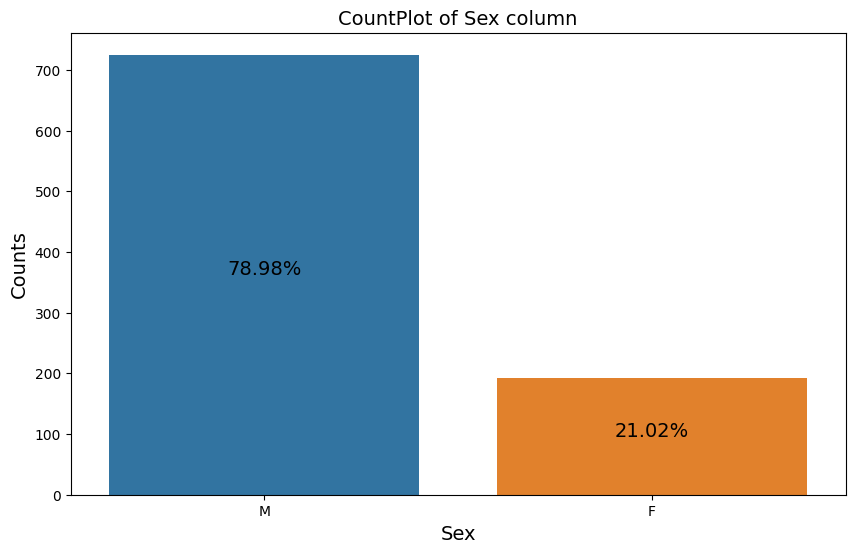

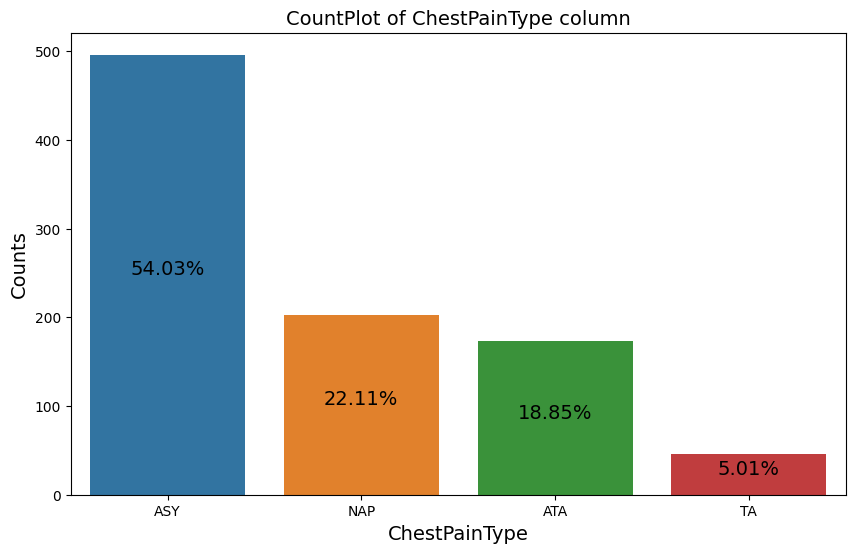

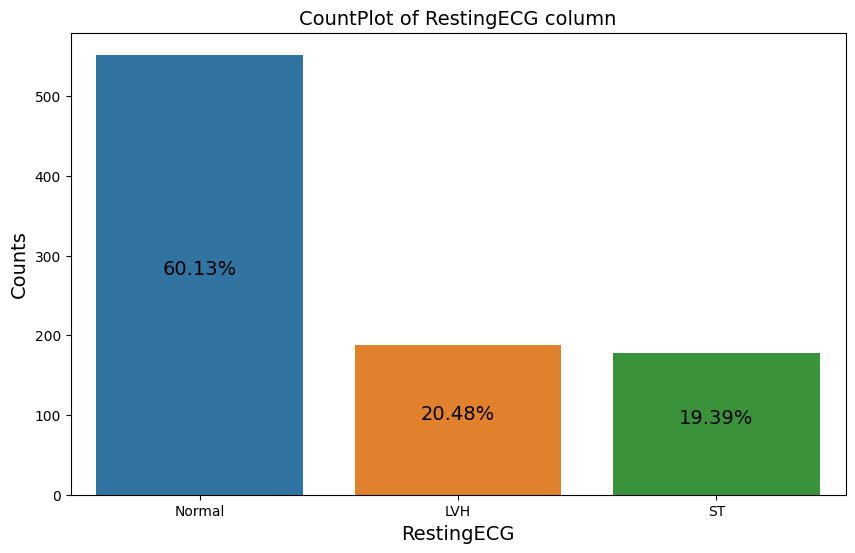

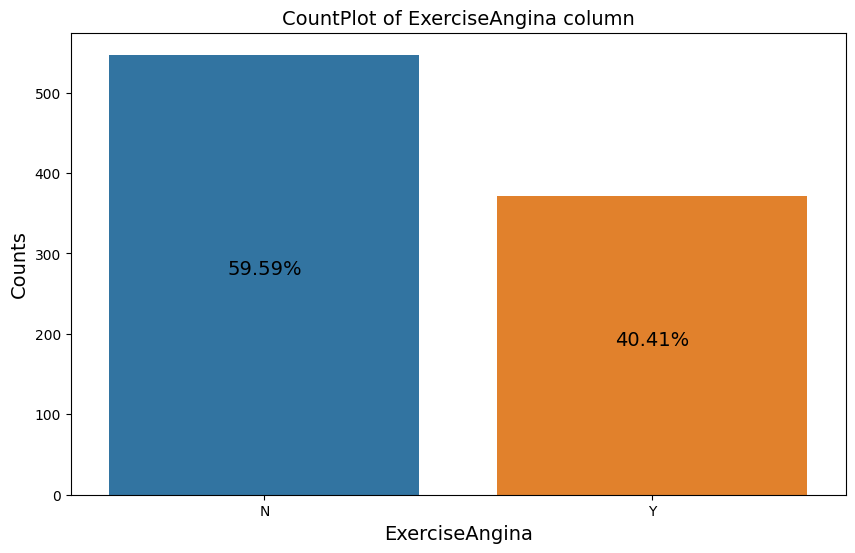

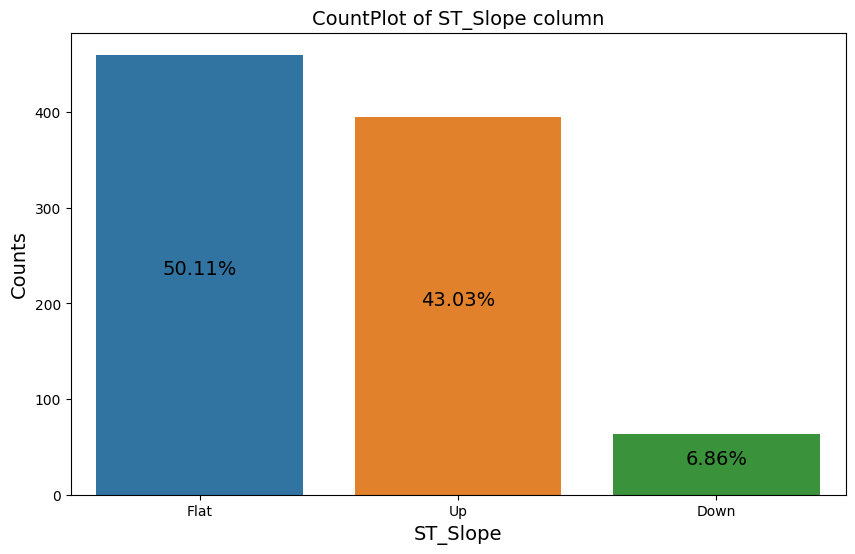

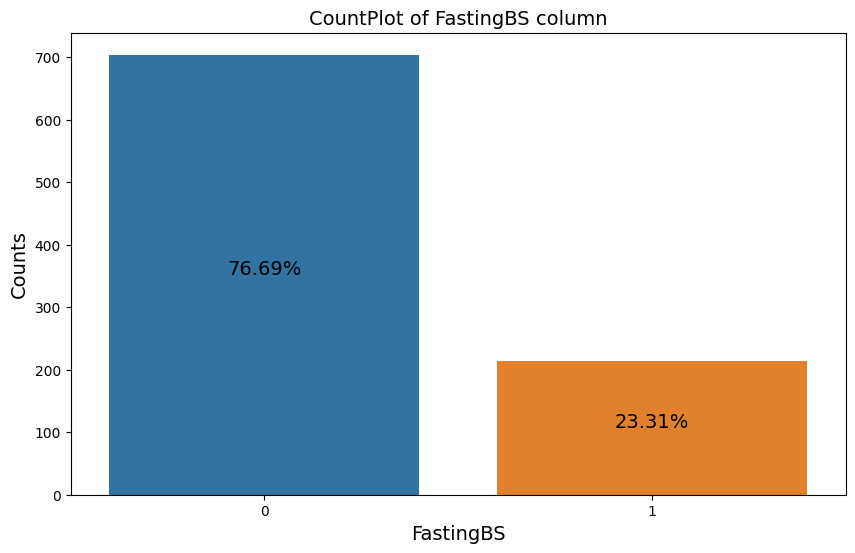

In [ ]:
for i in df_categ:
  countplot(i)

there are 2 columns have 0 & 1 values

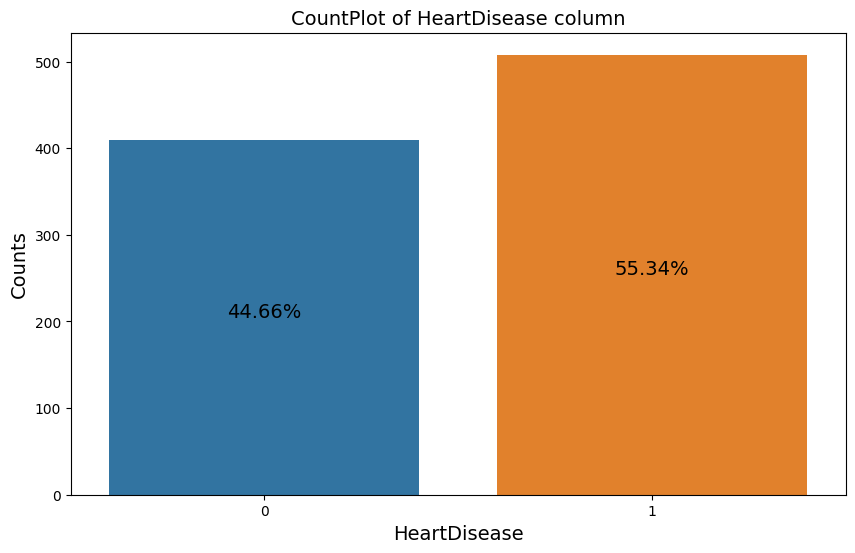

In [ ]:
HeartDisease_values = df_heart['HeartDisease'].value_counts(ascending=True)
# plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='HeartDisease', data=df_heart, order=HeartDisease_values.index)  ## ordered
plt.title('CountPlot of HeartDisease column', fontsize=14, c='k')
plt.xlabel('HeartDisease', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
# showing the percenatge
for i in range(HeartDisease_values.shape[0]):
  count = HeartDisease_values[i]
  strt='{:0.2f}%'.format(100*count / df_heart.shape[0])
  plt.text(i, count/2, strt, ha='center', color='black', fontsize=14)

data looks Balanced. 44% class 0, 55% class 1.

visualization of Numerical featuers:

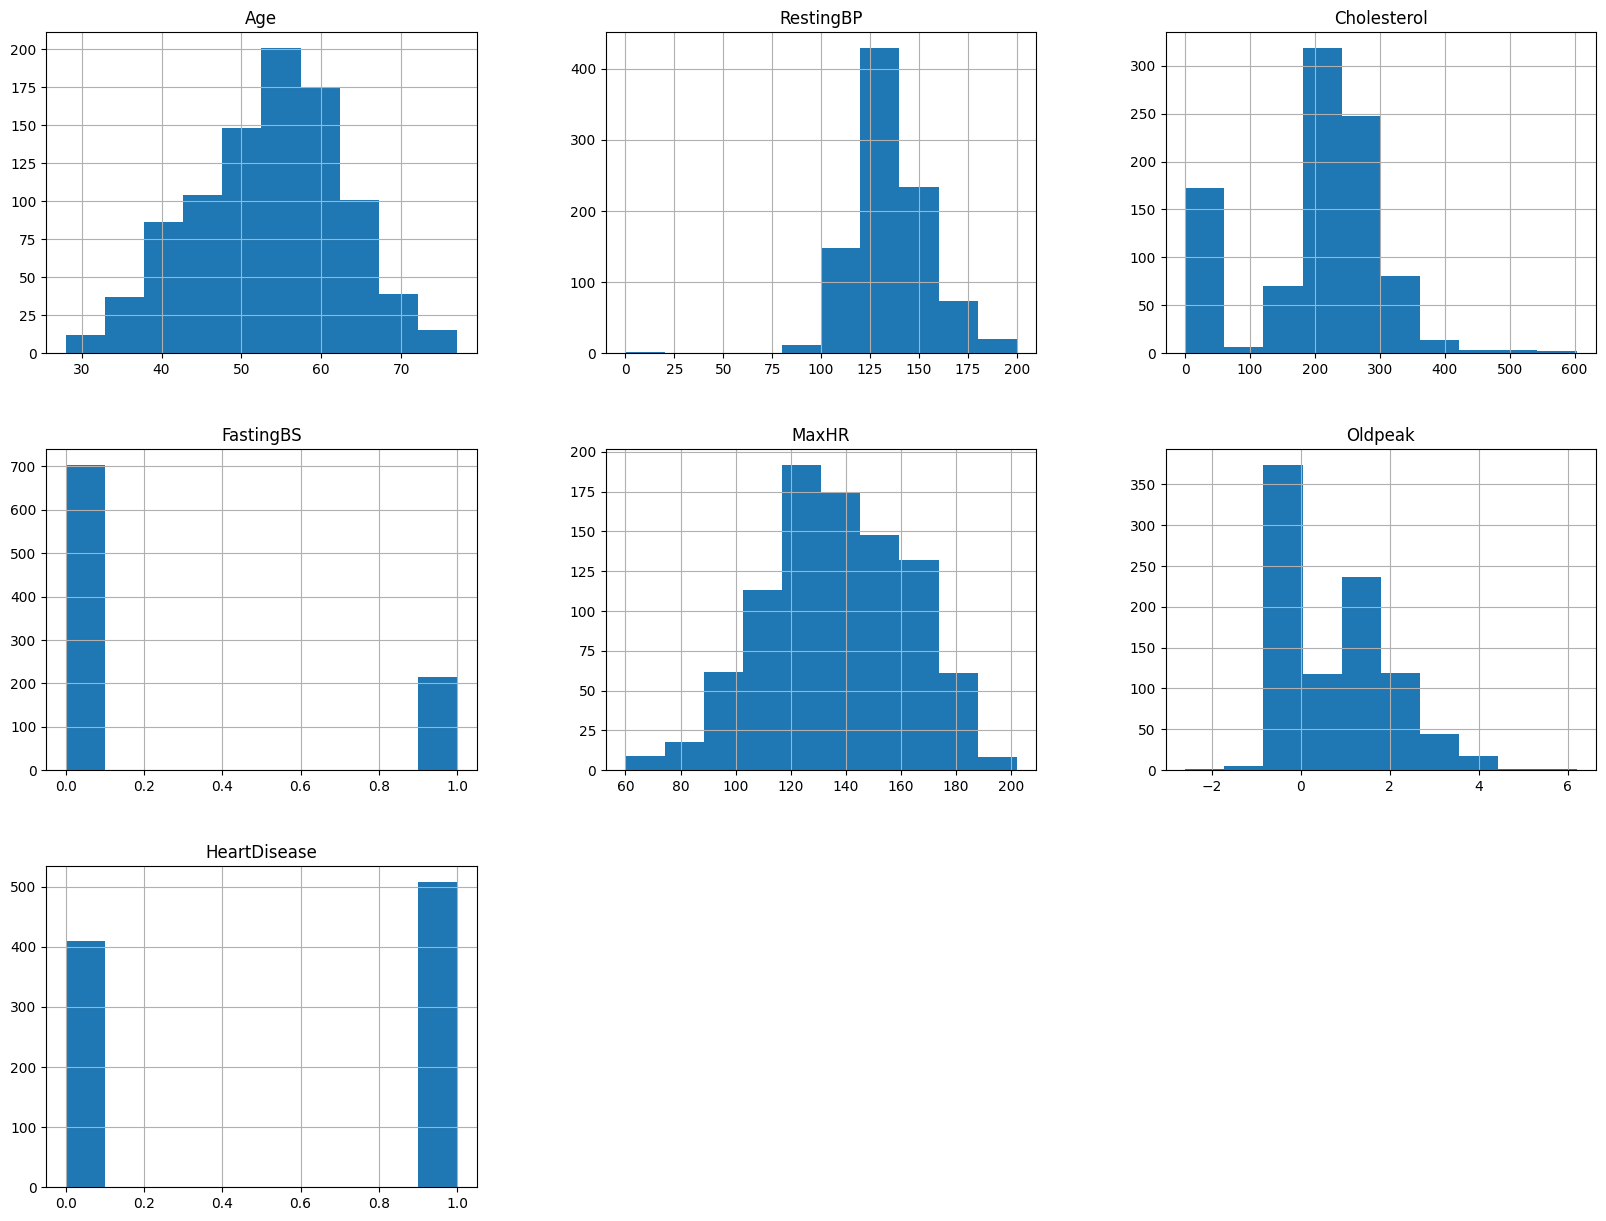

In [ ]:
df_heart.hist(bins=10, figsize=(20,15))
plt.show()

**show correlation Between features:**

In [ ]:
df_heart.corr()

<ipython-input-8-76fca54c21b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_heart.corr()


Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

<ipython-input-105-dc68ce9c27e8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_heart.corr(), annot=True)


<Axes: >

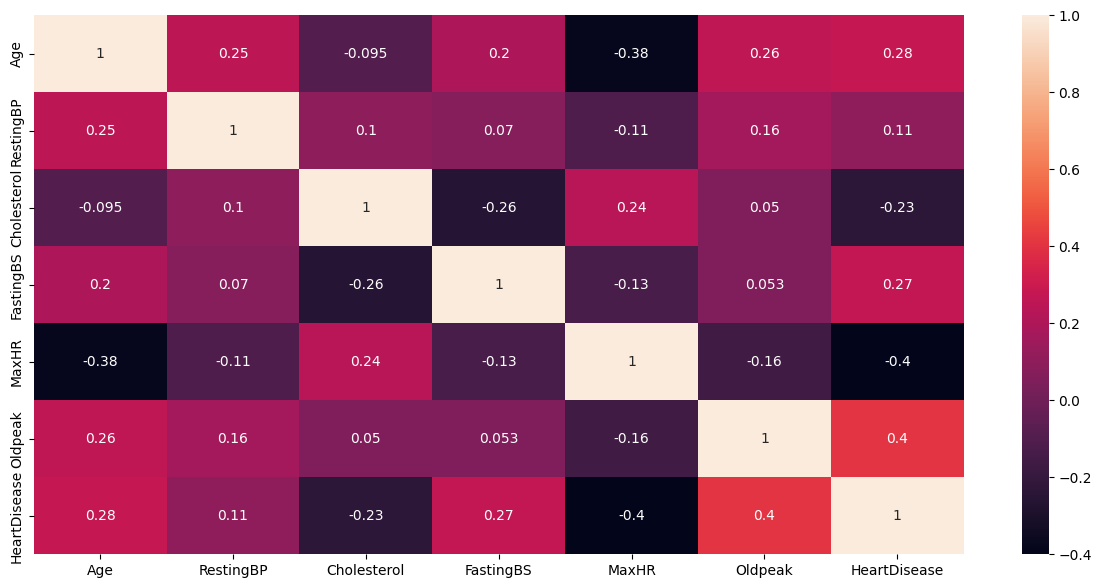

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(df_heart.corr(), annot=True)

In [ ]:
x = df_heart.drop('HeartDisease', axis=1)
y = df_heart['HeartDisease']

<ipython-input-12-58f2a01c064d>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x.corrwith(y).plot(kind='bar', grid=True, figsize=(12,8), title='Correlation with HeartDisease')


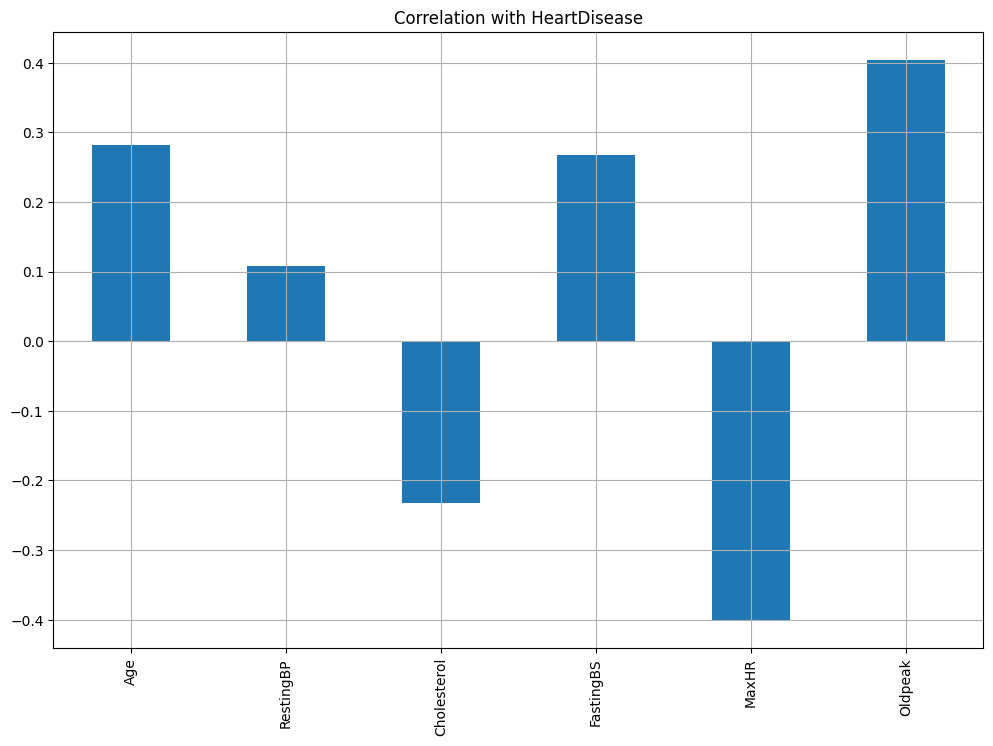

In [ ]:
x.corrwith(y).plot(kind='bar', grid=True, figsize=(12,8), title='Correlation with HeartDisease')
plt.savefig("/content/Images/Correlation with HeartDisease")

**Show Relations Between all Features and Target:**

In [ ]:
#show categorical Features
for i, col in enumerate(df_categ, 1):

  fig = px.histogram(df_heart, x="HeartDisease", color=col, hover_data=df_heart.columns, title=f"Relation Between Heart Disease & {col} feature", barmode="group")

  fig.show()

**Observation for Categorical Features:**

*   **Sex:** **"Male"** is more likely to have heart disease than Female.

*   **ChestPainType:** People have type **"ASY"** are more likely to have heart disease than people have other Types, then "NAP".

*   **FastingBS:** people have **"BS < 120"** are sometimes have heart disease and another sometimes have not. and most of people have **BS > 120** also have heart disease.

*   **RestingECG:** people have **"Normal"** type are more likely to have heart disease, then "ST", finally "LVH".

*   **ExerciseAngina:** Most people have Angina **"Yes"** have heart disease.

*   **ST_Slop:** **"Flat"** slope display a very high probability of being diagnosed with heart disease, then "Up", then "Down".











In [ ]:
#show Numerical Features
for i, col in enumerate(df_num, 1):

  fig = px.histogram(df_heart, x=col, color="HeartDisease", hover_data=df_heart.columns, title=f"Relation Between Heart Disease & {col} feature", barmode="group")

  fig.show()

**Observation for Numerical Features:**

*   **Age:** people have **"54+"** are more likely to have heart disease.

*   **RestingBP:** Most values overlapping, but values in range **"135 <"** have high probability of being diagnosed with heart disease.

*   **Cholesterol:** zero values it effect on results and it does not make sense,so i will handle it in preprocessig step, but values in range **"280 <"** have high probability of being diagnosed with heart disease.

*   **MaxHR:** people have MaxHR in range **"90:149"** have high probability of being diagnosed with heart disease.

*   **Oldpeak:** Most values display Heart disease, but values in range **"1<"** display high probability being diagnosed with heart disease.











# **Try Some Feature Engineering**

**show numerical featuers as levels:**

In [ ]:
df = df_heart.copy()

In [ ]:
def countplot2(col):
  col_values = df[col].value_counts()
  # plotting
  plt.figure(figsize=(10, 6))
  sns.countplot(x=col, data=df, order=col_values.index)  ## ordered
  plt.title('CountPlot of categorical column', fontsize=14, c='k')
  plt.xlabel(col, fontsize=14, c='k')
  plt.ylabel('Counts', fontsize=14, c='k')
  # showing the percenatge
  for i in range(col_values.shape[0]):
    count = col_values[i]
    strt='{:0.2f}%'.format(100*count / df_heart.shape[0])
    plt.text(i, count/2, strt, ha='center', color='black', fontsize=14)

In [ ]:
#RestingBP Feature
df['RestingBP'] = pd.cut(x=df_heart['RestingBP'],
                          bins=[80, 110, 130, np.inf],
                          labels=['Low', 'Normal', 'High'])

In [ ]:
df['RestingBP'].value_counts()

High      425
Normal    381
Low       110
Name: RestingBP, dtype: int64

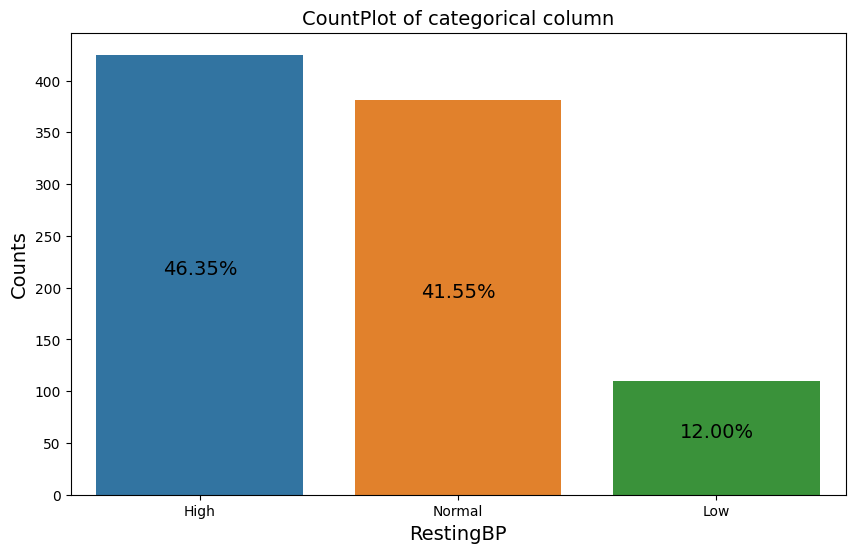

In [ ]:
countplot2('RestingBP')

In [ ]:
fig = px.histogram(df, x=df['RestingBP'], color="HeartDisease", hover_data=df.columns, title=f"Relation Between Heart Disease & RestingBP feature", barmode="group")

fig.show()

RestingBP ordered based on Heart Failure:
High>Normal>Low

In [ ]:
#Cholesterol Feature
df['Cholesterol'] = pd.cut(df_heart['Cholesterol'],
                          bins=[0, 200, 240, np.inf],
                          labels=['Normal', 'High', 'Very High'])

In [ ]:
df['Cholesterol'].value_counts()

Very High    355
High         241
Normal       150
Name: Cholesterol, dtype: int64

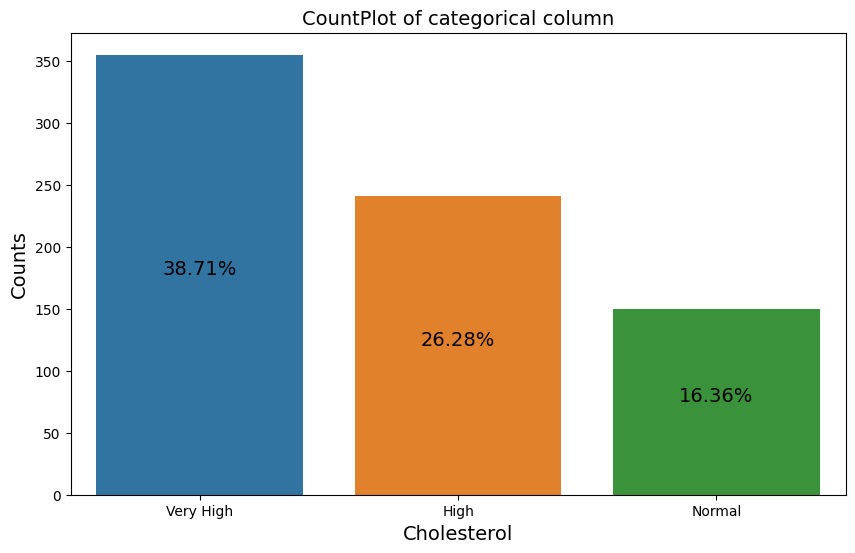

In [ ]:
countplot2('Cholesterol')

In [ ]:
fig = px.histogram(df, x=df['Cholesterol'], color="HeartDisease", hover_data=df.columns, title=f"Relation Between Heart Disease & cholesterol feature", barmode="group")

fig.show()

Cholesterol ordered based on Heart Failure:
very High>High>Normal

In [ ]:
LE = LabelEncoder()
df['Cholesterol'] = LE.fit_transform(df['Cholesterol'])
df['RestingBP'] = LE.fit_transform(df['RestingBP'])
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA          0            2          0     Normal    172   
1   49   F           NAP          0            1          0     Normal    156   
2   37   M           ATA          2            2          0         ST     98   
3   48   F           ASY          0            0          0     Normal    108   
4   54   M           NAP          0            1          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [ ]:
df.corr()

<ipython-input-66-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000  -0.228164     0.117992   0.198170 -0.382280  0.258563   
RestingBP    -0.228164   1.000000    -0.001208  -0.080193  0.081155 -0.155627   
Cholesterol   0.117992  -0.001208     1.000000   0.234753 -0.197726  0.012373   
FastingBS     0.198170  -0.080193     0.234753   1.000000 -0.131067  0.053062   
MaxHR        -0.382280   0.081155    -0.197726  -0.131067  1.000000 -0.161213   
Oldpeak       0.258563  -0.155627     0.012373   0.053062 -0.161213  1.000000   
HeartDisease  0.282012  -0.118643     0.276045   0.267994 -0.401410  0.403638   

              HeartDisease  
Age               0.282012  
RestingBP        -0.118643  
Cholesterol       0.276045  
FastingBS         0.267994  
MaxHR            -0.401410  
Oldpeak           0.403638  
HeartDisease      1.000000

Correlation between Cholesterol, RestingBP columns with HeartDisease is low, so i will not use This feature engineering in Machine learning algorithm.

# **Data Preprocessing:**

Handle zero rows

In [ ]:
#Handle Zeros in cholestrol column
df_heart[df_heart['Cholesterol'] == 0].value_counts().sum()

172

In [ ]:
df_heart['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [ ]:
# i will use median of cholesterol to replace zeros values
df_heart.loc[(df_heart['Cholesterol'] == 0), 'Cholesterol'] = 223
df_heart['Cholesterol'].value_counts()

223    182
254     11
220     10
216      9
230      9
      ... 
347      1
365      1
412      1
491      1
131      1
Name: Cholesterol, Length: 221, dtype: int64

In [ ]:
#Handle Zeros in RestingBP column
df_heart[df_heart['RestingBP'] == 0].value_counts().sum()

1

In [ ]:
df_heart['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [ ]:
# i will use median of RestingBP to replace zeros values
df_heart.loc[(df_heart['RestingBP'] == 0), 'RestingBP'] = 132
df_heart['RestingBP'].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 66, dtype: int64

Convert Categorical Features to Numerical:

In [ ]:
# i use get_dummies because features are Nominal not ordinal
df = pd.get_dummies(df_heart, columns = df_categ[:])
df.head()

Age  RestingBP  Cholesterol  MaxHR  Oldpeak  HeartDisease  Sex_F  Sex_M  \
0   40        140          289    172      0.0             0      0      1   
1   49        160          180    156      1.0             1      1      0   
2   37        130          283     98      0.0             0      0      1   
3   48        138          214    108      1.5             1      1      0   
4   54        150          195    122      0.0             0      0      1   

   ChestPainType_ASY  ChestPainType_ATA  ...  RestingECG_LVH  \
0                  0                  1  ...               0   
1                  0                  0  ...               0   
2                  0                  1  ...               0   
3                  1                  0  ...               0   
4                  0                  0  ...               0   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  ExerciseAngina_Y  \
0                  1              0                 1                 0   
1                  1              0                 1                 0   
2                  0              1                 1                 0   
3                  1              0                 0                 1   
4                  1              0                 1                 0   

   ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  FastingBS_0  FastingBS_1  
0              0              0            1            1            0  
1              0              1            0            1            0  
2              0              0            1            1            0  
3              0              1            0            1            0  
4              0              0            1            1            0  

[5 rows x 22 columns]

In [ ]:
df.corr()

Age  RestingBP  Cholesterol     MaxHR   Oldpeak  \
Age                1.000000   0.263076     0.030979 -0.382045  0.258612   
RestingBP          0.263076   1.000000     0.090797 -0.109686  0.174201   
Cholesterol        0.030979   0.090797     1.000000  0.026734  0.056731   
MaxHR             -0.382045  -0.109686     0.026734  1.000000 -0.160691   
Oldpeak            0.258612   0.174201     0.056731 -0.160691  1.000000   
HeartDisease       0.282039   0.117909     0.042988 -0.400421  0.403951   
Sex_F             -0.055750  -0.009408     0.127426  0.189186 -0.105734   
Sex_M              0.055750   0.009408    -0.127426 -0.189186  0.105734   
ChestPainType_ASY  0.166607   0.041576     0.054508 -0.354963  0.280026   
ChestPainType_ATA -0.218165  -0.051352     0.013287  0.253735 -0.262124   
ChestPainType_NAP -0.011335  -0.027545    -0.057216  0.134580 -0.106212   
ChestPainType_TA   0.032042   0.049470    -0.039493  0.100025  0.032231   
RestingECG_LVH     0.145727   0.050657     0.099694  0.125793  0.086794   
RestingECG_Normal -0.230566  -0.113744    -0.045074  0.023801 -0.116719   
RestingECG_ST      0.136798   0.089161    -0.045938 -0.157879  0.055958   
ExerciseAngina_N  -0.215793  -0.153034    -0.063698  0.370425 -0.408752   
ExerciseAngina_Y   0.215793   0.153034     0.063698 -0.370425  0.408752   
ST_Slope_Down      0.138397  -0.010314    -0.022971 -0.073316  0.322130   
ST_Slope_Flat      0.185568   0.110078     0.075164 -0.342581  0.283295   
ST_Slope_Up       -0.258067  -0.105897    -0.064176  0.383397 -0.450577   
FastingBS_0       -0.198039  -0.067830     0.008045  0.131438 -0.052698   
FastingBS_1        0.198039   0.067830    -0.008045 -0.131438  0.052698   

                   HeartDisease     Sex_F     Sex_M  ChestPainType_ASY  \
Age                    0.282039 -0.055750  0.055750           0.166607   
RestingBP              0.117909 -0.009408  0.009408           0.041576   
Cholesterol            0.042988  0.127426 -0.127426           0.054508   
MaxHR                 -0.400421  0.189186 -0.189186          -0.354963   
Oldpeak                0.403951 -0.105734  0.105734           0.280026   
HeartDisease           1.000000 -0.305445  0.305445           0.516716   
Sex_F                 -0.305445  1.000000 -1.000000          -0.183876   
Sex_M                  0.305445 -1.000000  1.000000           0.183876   
ChestPainType_ASY      0.516716 -0.183876  0.183876           1.000000   
ChestPainType_ATA     -0.401924  0.161522 -0.161522          -0.522432   
ChestPainType_NAP     -0.212964  0.066486 -0.066486          -0.577670   
ChestPainType_TA      -0.054790  0.004031 -0.004031          -0.249003   
RestingECG_LVH         0.010670  0.049518 -0.049518           0.002289   
RestingECG_Normal     -0.091580  0.010634 -0.010634          -0.063606   
RestingECG_ST          0.102527 -0.063715  0.063715           0.076438   
ExerciseAngina_N      -0.494282  0.190664 -0.190664          -0.430034   
ExerciseAngina_Y       0.494282 -0.190664  0.190664           0.430034   
ST_Slope_Down          0.122527 -0.066036  0.066036           0.103407   
ST_Slope_Flat          0.554134 -0.116077  0.116077           0.303645   
ST_Slope_Up           -0.622164  0.150942 -0.150942          -0.359443   
FastingBS_0           -0.267291  0.120076 -0.120076          -0.131176   
FastingBS_1            0.267291 -0.120076  0.120076           0.131176   

                   ChestPainType_ATA  ...  RestingECG_LVH  RestingECG_Normal  \
Age                        -0.218165  ...        0.145727          -0.230566   
RestingBP                  -0.051352  ...        0.050657          -0.113744   
Cholesterol                 0.013287  ...        0.099694          -0.045074   
MaxHR                       0.253735  ...        0.125793           0.023801   
Oldpeak                    -0.262124  ...        0.086794          -0.116719   
HeartDisease               -0.401924  ...        0.010670          -0.091580   
Sex_F                       0.16152

In [ ]:
x_3 = df.drop('HeartDisease', axis=1)
y_3 = df['HeartDisease']

<Axes: title={'center': 'Correlation with HeartDisease'}>

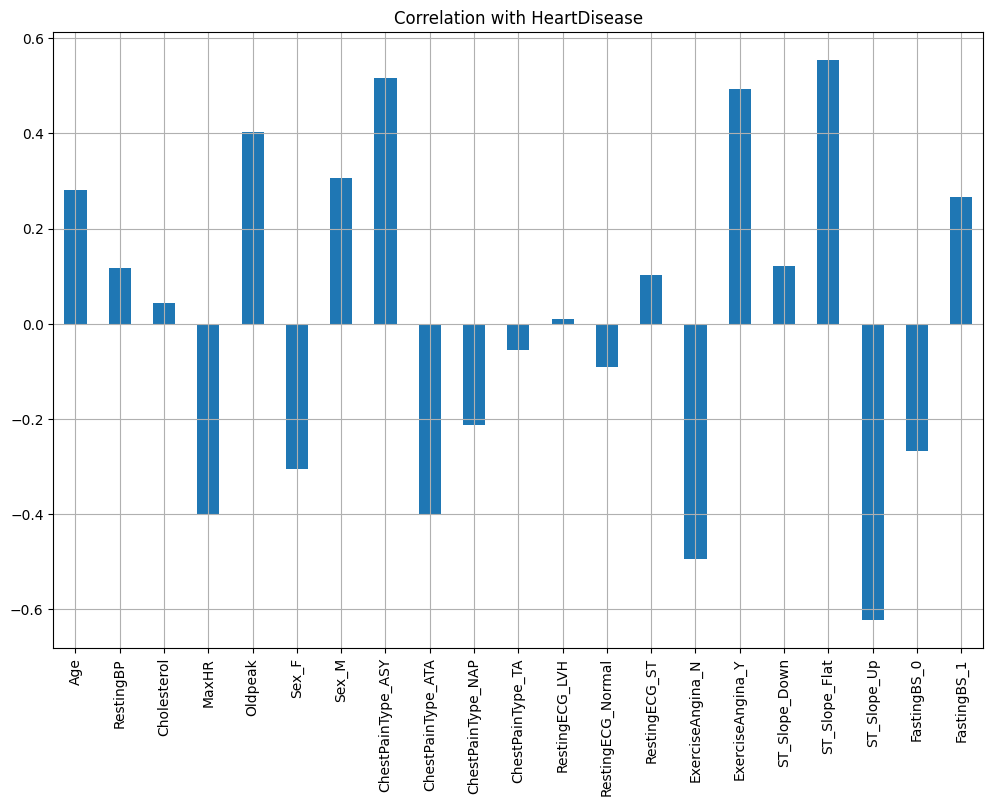

In [ ]:
x_3.corrwith(y_3).plot(kind='bar', grid=True, figsize=(12,8), title='Correlation with HeartDisease')

Data Scalling:

In [ ]:
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

In [ ]:
df1 = df.copy()
df2 = df.copy()

In [ ]:
#Data Normalization
df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = mms.fit_transform(df1[['Age']])
df1['RestingBP'] = mms.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = mms.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = mms.fit_transform(df1[['MaxHR']])
df1.head()

Age  RestingBP  Cholesterol     MaxHR   Oldpeak  HeartDisease  Sex_F  \
0  0.244898   0.500000     0.393822  0.788732  0.295455             0      0   
1  0.428571   0.666667     0.183398  0.676056  0.409091             1      1   
2  0.183673   0.416667     0.382239  0.267606  0.295455             0      0   
3  0.408163   0.483333     0.249035  0.338028  0.465909             1      1   
4  0.530612   0.583333     0.212355  0.436620  0.295455             0      0   

   Sex_M  ChestPainType_ASY  ChestPainType_ATA  ...  RestingECG_LVH  \
0      1                  0                  1  ...               0   
1      0                  0                  0  ...               0   
2      1                  0                  1  ...               0   
3      0                  1                  0  ...               0   
4      1                  0                  0  ...               0   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  ExerciseAngina_Y  \
0                  1              0                 1                 0   
1                  1              0                 1                 0   
2                  0              1                 1                 0   
3                  1              0                 0                 1   
4                  1              0                 1                 0   

   ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  FastingBS_0  FastingBS_1  
0              0              0            1            1            0  
1              0              1            0            1            0  
2              0              0            1            1            0  
3              0              1            0            1            0  
4              0              0            1            1            0  

[5 rows x 22 columns]

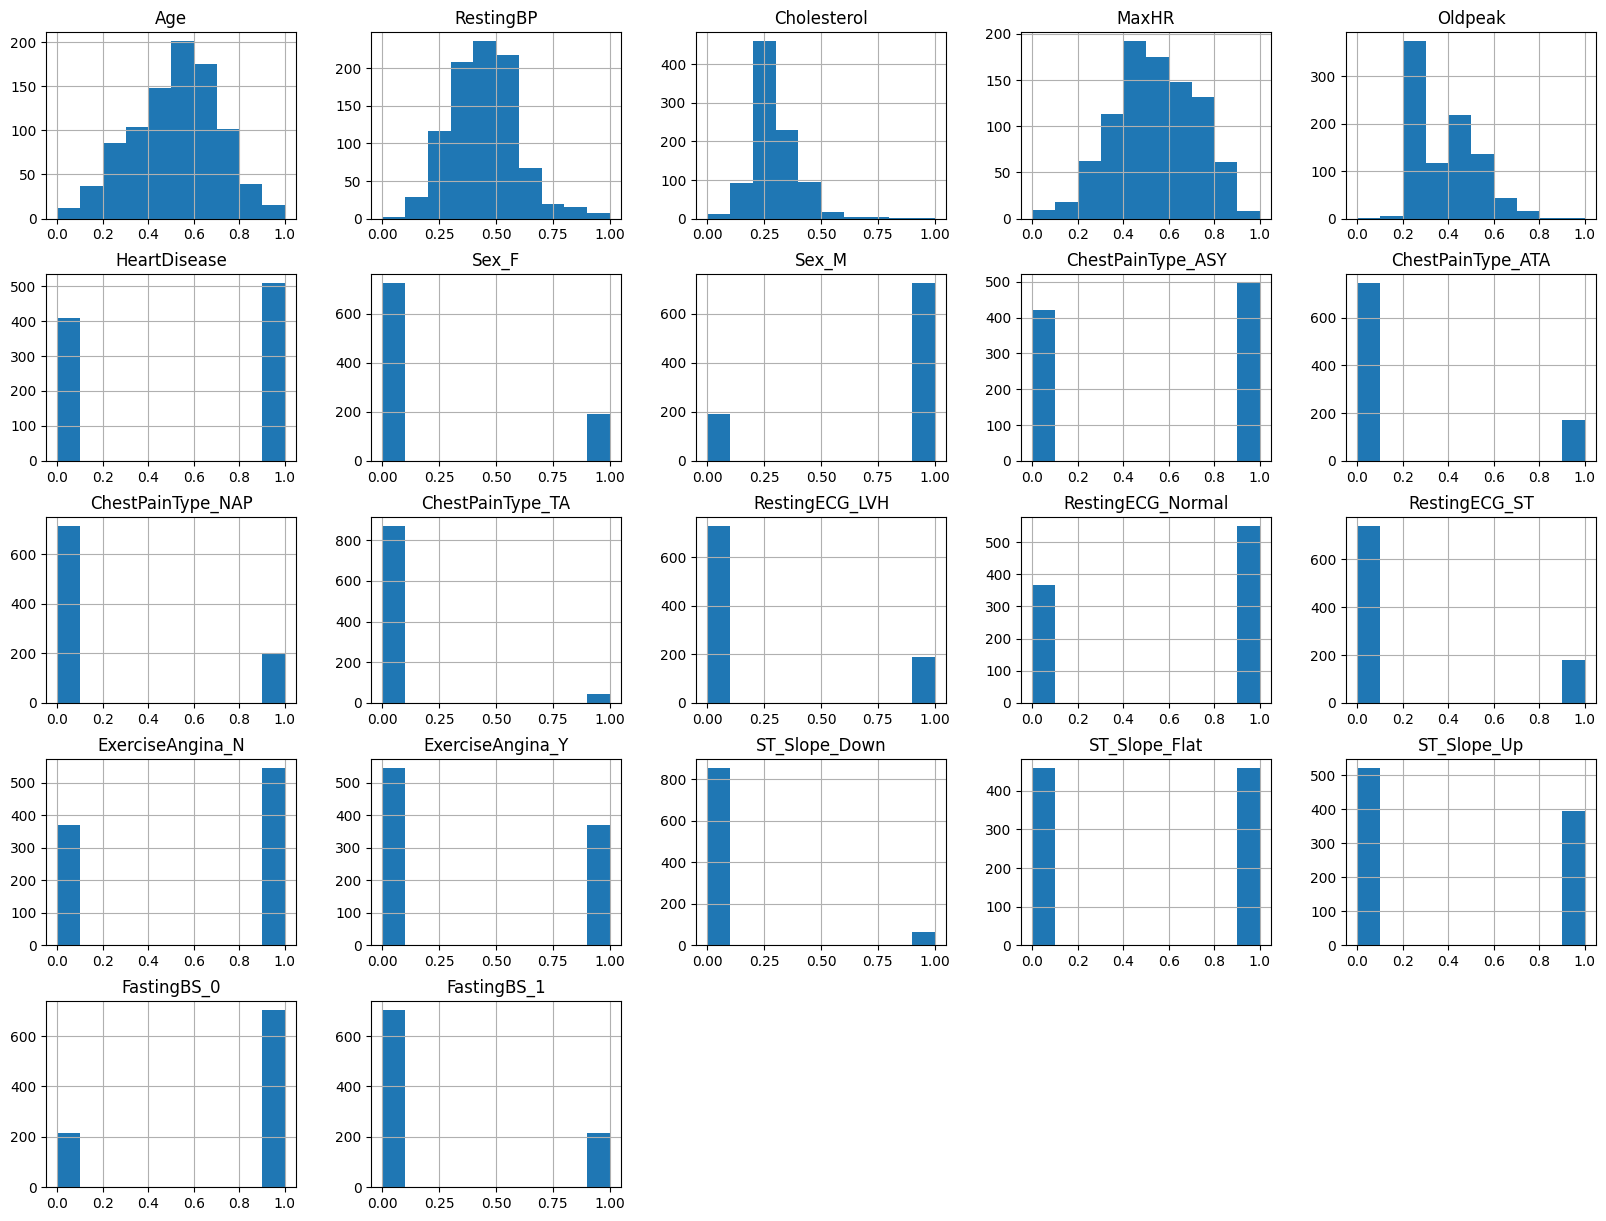

In [ ]:
df1.hist(bins=10, figsize=(20,15))
plt.show()

In [ ]:
#Data Standardization
df2['Oldpeak'] = ss.fit_transform(df2[['Oldpeak']])
df2['Age'] = ss.fit_transform(df2[['Age']])
df2['RestingBP'] = ss.fit_transform(df2[['RestingBP']])
df2['Cholesterol'] = ss.fit_transform(df2[['Cholesterol']])
df2['MaxHR'] = ss.fit_transform(df2[['MaxHR']])
df2.head()

Age  RestingBP  Cholesterol     MaxHR   Oldpeak  HeartDisease  Sex_F  \
0 -1.433140   0.414885     0.897407  1.382928 -0.832432             0      0   
1 -0.478484   1.527224    -1.122849  0.754157  0.105664             1      1   
2 -1.751359  -0.141284     0.786200 -1.525138 -0.832432             0      0   
3 -0.584556   0.303651    -0.492677 -1.132156  0.574711             1      1   
4  0.051881   0.971054    -0.844832 -0.581981 -0.832432             0      0   

   Sex_M  ChestPainType_ASY  ChestPainType_ATA  ...  RestingECG_LVH  \
0      1                  0                  1  ...               0   
1      0                  0                  0  ...               0   
2      1                  0                  1  ...               0   
3      0                  1                  0  ...               0   
4      1                  0                  0  ...               0   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  ExerciseAngina_Y  \
0                  1              0                 1                 0   
1                  1              0                 1                 0   
2                  0              1                 1                 0   
3                  1              0                 0                 1   
4                  1              0                 1                 0   

   ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  FastingBS_0  FastingBS_1  
0              0              0            1            1            0  
1              0              1            0            1            0  
2              0              0            1            1            0  
3              0              1            0            1            0  
4              0              0            1            1            0  

[5 rows x 22 columns]

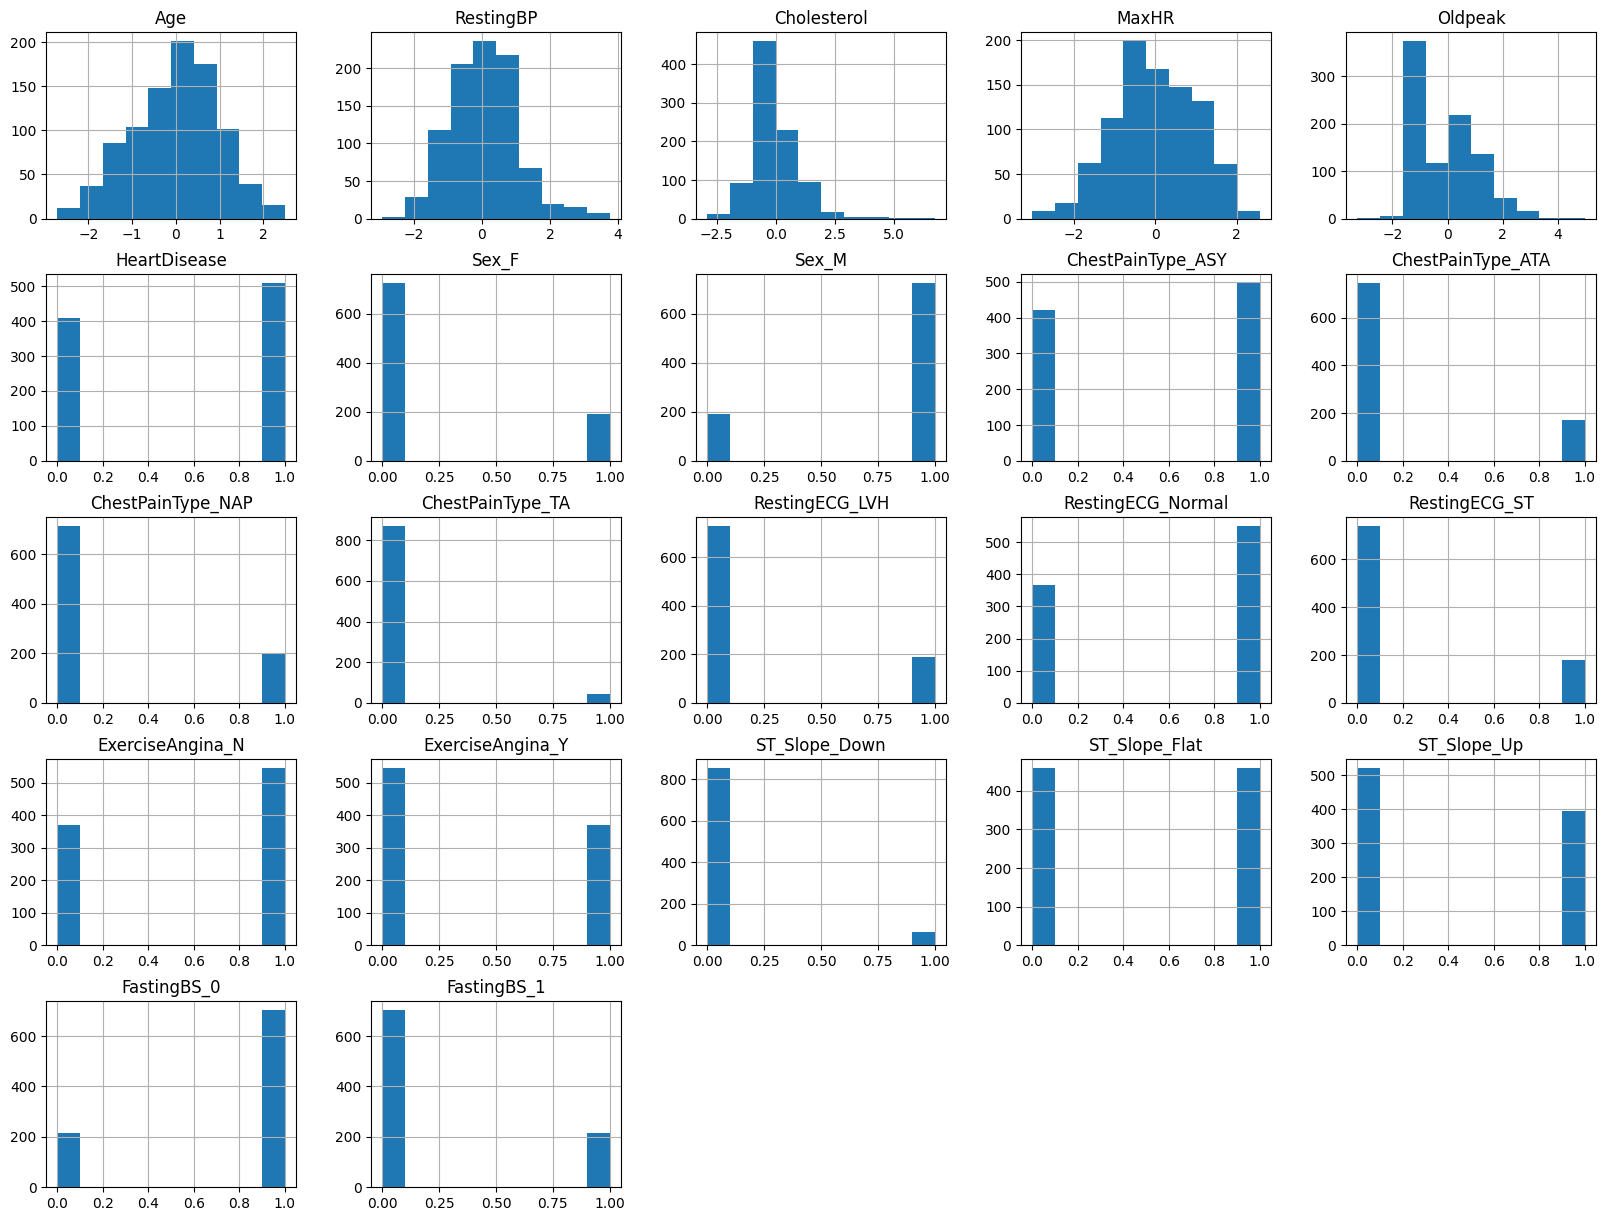

In [ ]:
df2.hist(bins=10, figsize=(20,15))
plt.show()

after i tried Normalization & Standardization i found Normalization is better, so i use it.

**split Data**

In [ ]:
#split data into Features & Target

#data Normalized
X1 = df1.drop('HeartDisease', axis=1)
y1 = df1['HeartDisease']

#data scaled
X2 = df2.drop('HeartDisease', axis=1)
y2 = df2['HeartDisease']

In [ ]:
#data Normalized
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)
#data scaled
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

# **ML**

**LogisticRegression:**

In [ ]:
LR_model = LogisticRegression()

In [ ]:
LR_model.fit(X_train1, y_train1)

LogisticRegression()

In [ ]:
y_train_pred1 = LR_model.predict(X_train1)
y_test_pred1 = LR_model.predict(X_test1)
train_accuracy = accuracy_score(y_train1, y_train_pred1)
test_accuracy = accuracy_score(y_test1, y_test_pred1)
confusion_mat = confusion_matrix(y_test1, y_test_pred1)
class_report = classification_report(y_test1, y_test_pred1)


print("Train Accuracy Score:", train_accuracy)
print("Test Accuracy Score:\n", test_accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", class_report)

Train Accuracy Score: 0.8634146341463415
Test Accuracy Score:
 0.8613861386138614
Confusion Matrix:
 [[111  12]
 [ 30 150]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       123
           1       0.93      0.83      0.88       180

    accuracy                           0.86       303
   macro avg       0.86      0.87      0.86       303
weighted avg       0.87      0.86      0.86       303



<Axes: >

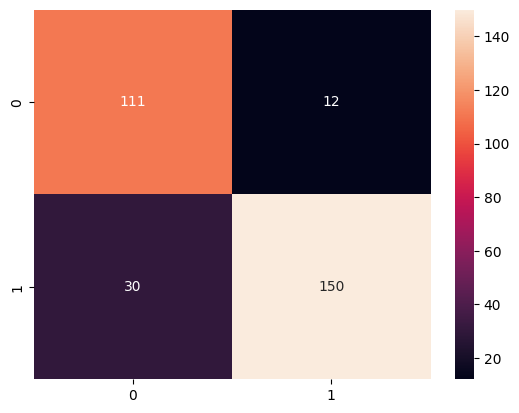

In [ ]:
sns.heatmap(confusion_mat, annot=True, fmt='d')

**Features Importance:**

Feature ranking:
1. Oldpeak (1.8439517109026018)
2. ST_Slope_Flat (1.2538173123368348)
3. ST_Slope_Down (1.1237796989971394)
4. Sex_M (1.0324946772340584)
5. Age (0.6876538750402997)
6. HeartDisease (0.5712219516062956)
7. Sex_F (0.5711504895499672)
8. ST_Slope_Up (0.5615857767301972)
9. FastingBS_0 (0.5615143146738683)
10. RestingECG_ST (0.5262162445481278)
11. ExerciseAngina_N (0.5261447824918013)
12. ChestPainType_ASY (0.5202049268082185)
13. MaxHR (0.43086897422399784)
14. ChestPainType_ATA (0.35627795342564045)
15. RestingBP (0.22871673060493883)
16. ChestPainType_NAP (0.15608325905652706)
17. ExerciseAngina_Y (0.1299661512833664)
18. RestingECG_LVH (0.058798906731438894)
19. RestingECG_Normal (0.05789770919112667)
20. Cholesterol (0.016715873332844366)
21. ChestPainType_TA (0.000972659596642391)


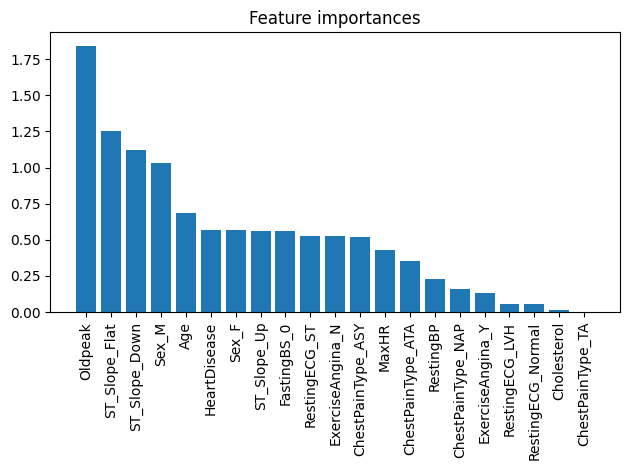

In [ ]:
# Extract the absolute values of the coefficients from the model
importances = np.abs(LR_model.coef_).ravel()
# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X1.shape[1]):
    print(f"{f+1}. {df1.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X1.shape[1]), importances[indices])
plt.xticks(range(X1.shape[1]), df1.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

**DecisionTree:**

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_train_pred2 = dt_model.predict(X_train1)
y_test_pred2 = dt_model.predict(X_test1)
train_accuracy2 = accuracy_score(y_train1, y_train_pred2)
test_accuracy2 = accuracy_score(y_test1, y_test_pred2)
confusion_mat2 = confusion_matrix(y_test1, y_test_pred2)
class_report2 = classification_report(y_test1, y_test_pred2)


print("Train Accuracy Score:", train_accuracy2)
print("Test Accuracy Score:\n", test_accuracy2)
print("Confusion Matrix:\n", confusion_mat2)
print("Classification Report:\n", class_report2)

Train Accuracy Score: 0.8845528455284553
Test Accuracy Score:
 0.7920792079207921
Confusion Matrix:
 [[101  22]
 [ 41 139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76       123
           1       0.86      0.77      0.82       180

    accuracy                           0.79       303
   macro avg       0.79      0.80      0.79       303
weighted avg       0.80      0.79      0.79       303



<Axes: >

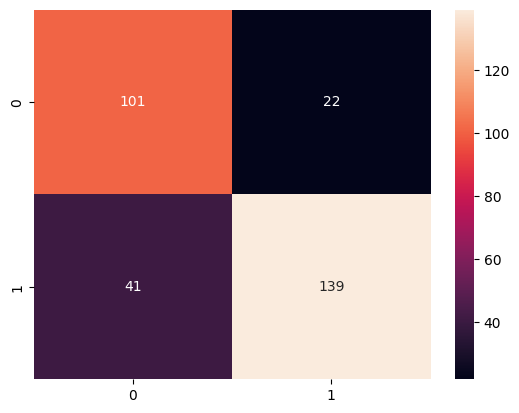

In [ ]:
sns.heatmap(confusion_mat2, annot=True, fmt='d')

In [ ]:
importances = dt_model.feature_importances_
indices = importances.argsort()[::-1]
indices

array([18,  4,  7,  5,  0,  3,  2,  1, 20, 15, 13, 11, 19,  9,  8, 12,  6,
       14, 16, 17, 10])

In [ ]:
df1.columns[indices]

Index(['ST_Slope_Flat', 'Oldpeak', 'Sex_M', 'HeartDisease', 'Age', 'MaxHR',
       'Cholesterol', 'RestingBP', 'FastingBS_0', 'ExerciseAngina_N',
       'RestingECG_Normal', 'ChestPainType_TA', 'ST_Slope_Up',
       'ChestPainType_ATA', 'ChestPainType_ASY', 'RestingECG_LVH', 'Sex_F',
       'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ChestPainType_NAP'],
      dtype='object')

In [ ]:
# Print the feature ranking
print("Feature ranking:")
for f in range(X1.shape[1]):
    print(f"{f+1}. {df1.columns[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. ST_Slope_Flat (0.6172495183594732)
2. Oldpeak (0.10813654506957042)
3. Sex_M (0.09214349501759471)
4. HeartDisease (0.039127659088852074)
5. Age (0.03136612006754348)
6. MaxHR (0.02899585271918441)
7. Cholesterol (0.024286441952085205)
8. RestingBP (0.01995696791086754)
9. FastingBS_0 (0.016593182802528587)
10. ExerciseAngina_N (0.014303938138105668)
11. RestingECG_Normal (0.007840278874194768)
12. ChestPainType_TA (0.0)
13. ST_Slope_Up (0.0)
14. ChestPainType_ATA (0.0)
15. ChestPainType_ASY (0.0)
16. RestingECG_LVH (0.0)
17. Sex_F (0.0)
18. RestingECG_ST (0.0)
19. ExerciseAngina_Y (0.0)
20. ST_Slope_Down (0.0)
21. ChestPainType_NAP (0.0)


**Random Forest Algorithm:**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
rf_model.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

In [ ]:
y_train_pred3 = rf_model.predict(X_train1)
y_test_pred3 = rf_model.predict(X_test1)
train_accuracy3 = accuracy_score(y_train1, y_train_pred3)
test_accuracy3 = accuracy_score(y_test1, y_test_pred3)
confusion_mat3 = confusion_matrix(y_test1, y_test_pred3)
class_report3 = classification_report(y_test1, y_test_pred3)


print("Train Accuracy Score:", train_accuracy3)
print("Test Accuracy Score:\n", test_accuracy3)
print("Confusion Matrix:\n", confusion_mat3)
print("Classification Report:\n", class_report3)

Train Accuracy Score: 0.8943089430894309
Test Accuracy Score:
 0.858085808580858
Confusion Matrix:
 [[108  15]
 [ 28 152]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       123
           1       0.91      0.84      0.88       180

    accuracy                           0.86       303
   macro avg       0.85      0.86      0.86       303
weighted avg       0.86      0.86      0.86       303



<Axes: >

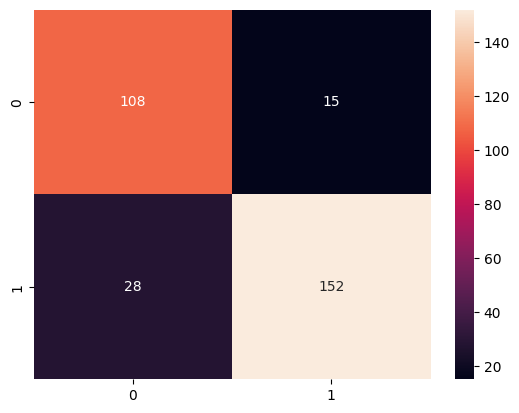

In [ ]:
sns.heatmap(confusion_mat3, annot=True, fmt='d')

# **Try some ML algorithms:**

In [ ]:
# Define the list of algorithms to try
algorithms = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), GaussianNB()]

# Evaluate each algorithm using cross-validation
results = {}
for i in algorithms:
    algorithm_name = type(i).__name__
    scores = cross_val_score(estimator=i, X= X_train1, y= y_train1, cv=5, scoring='accuracy')
    results[algorithm_name] = scores.mean()

# Print the results
for algorithm_name, metrics in results.items():
    print(f'{algorithm_name}: {metrics}')

# Choose the best algorithm based on the evaluation metrics
best_algorithm = max(results)
print(f'Best algorithm: {best_algorithm}')

LogisticRegression: 0.83739837398374
DecisionTreeClassifier: 0.7934959349593496
RandomForestClassifier: 0.8585365853658538
SVC: 0.8455284552845528
GaussianNB: 0.8487804878048781
Best algorithm: SVC


# **Try some codes and techniques but does not useful in the end:**

**Try to handling zeros on Cholesterol**

In [ ]:
df_heart['Cholesterol'].mean()

198.7995642701525

In [ ]:
df_heart.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [ ]:
df = df_heart.copy()

In [ ]:
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = 198
df['Cholesterol'].value_counts()

198    178
254     11
220     10
223     10
230      9
      ... 
347      1
365      1
412      1
491      1
131      1
Name: Cholesterol, Length: 221, dtype: int64

In [ ]:
# df.loc[(df['RestingBP'] > 120) & (df['Cholesterol'] == 0), 'Cholesterol'] = 223
# df.loc[(df['RestingBP'] <= 120) & (df['Cholesterol'] == 0), 'Cholesterol'] = 198
# df['Cholesterol'].value_counts()

223    114
198     74
254     11
220     10
211      9
      ... 
347      1
365      1
412      1
491      1
131      1
Name: Cholesterol, Length: 221, dtype: int64

In [ ]:
df.corr()

<ipython-input-114-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399     0.005616   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.099170   0.070193 -0.112135  0.164803   
Cholesterol   0.005616   0.099170     1.000000  -0.063646  0.074064  0.059177   
FastingBS     0.198039   0.070193    -0.063646   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.074064  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.059177   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.014086   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.014086  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

In [ ]:
x2 = df.drop('HeartDisease', axis=1)
y2 = df['HeartDisease']

<ipython-input-116-5a9b299ec14c>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x2.corrwith(y2).plot(kind='bar', grid=True, figsize=(12,8), title='Correlation with HeartDisease')


<Axes: title={'center': 'Correlation with HeartDisease'}>

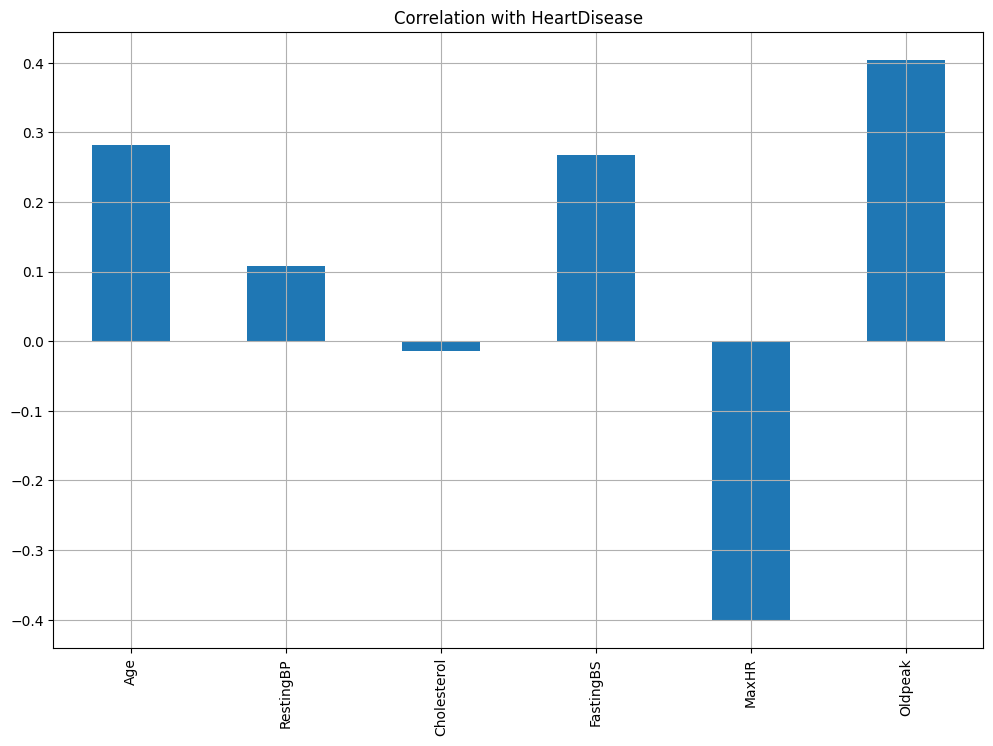

In [ ]:
x2.corrwith(y2).plot(kind='bar', grid=True, figsize=(12,8), title='Correlation with HeartDisease')

In [ ]:
# if df['RestingBP'] > 120:
#   df['Cholesterol'] = df['Cholesterol'].replace('0', '198')
# else:
#   df['Cholesterol'] = df['Cholesterol'].replace('0', '223')

#df.where((df['RestingBP'] > 120) & (df['Cholesterol'] == 0))
 # df[df['Cholesterol'] == 0] = 223
#df['Cholesterol'].value_counts()

In [ ]:
df1 = df_heart[['RestingBP', 'Cholesterol']].sort_values('Cholesterol')
df2 = df1[df1['Cholesterol'] == 0]
df2.drop(df2[df2['RestingBP'] == 0 ].index, inplace=True)
#df2['RestingBP'].max()
#df2['RestingBP'].min()
#df2['RestingBP'].mean()
#df2['RestingBP'].median()
df2[df2['RestingBP'] > 120 ].value_counts().sum()
df2.head()


# if df2['RestingBP'] > 120:
#   df2['Cholesterol'] = df2['Cholesterol'].replace({'0': '198'}, inplace=True)
# else:
#   df2['Cholesterol'] = df2['Cholesterol'].replace({'0': '223'}, inplace=True)


<ipython-input-71-e6a93ca7ef9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[df2['RestingBP'] == 0 ].index, inplace=True)


RestingBP  Cholesterol
458        134            0
369        150            0
368        140            0
367        135            0
366        150            0

In [ ]:
df1 = df_heart[['FastingBS', 'Cholesterol']].sort_values('Cholesterol')
df2 = df1[df1['Cholesterol'] == 0]

df2[df2['FastingBS'] == 1 ].value_counts().sum()
#df2.head()

89

In [ ]:
df = df_heart.copy()

In [ ]:
df.loc[(df['FastingBS'] == 1) & (df['Cholesterol'] == 0), 'Cholesterol'] = 223
df.loc[(df['FastingBS'] == 0) & (df['Cholesterol'] == 0), 'Cholesterol'] = 198
df['Cholesterol'].value_counts()

223    99
198    89
254    11
220    10
211     9
       ..
347     1
365     1
412     1
491     1
131     1
Name: Cholesterol, Length: 221, dtype: int64

In [ ]:
x3 = df.drop('HeartDisease', axis=1)
y3 = df['HeartDisease']

<ipython-input-127-a2fe3d688443>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x3.corrwith(y3).plot(kind='bar', grid=True, figsize=(12,8), title='Correlation with HeartDisease')


<Axes: title={'center': 'Correlation with HeartDisease'}>

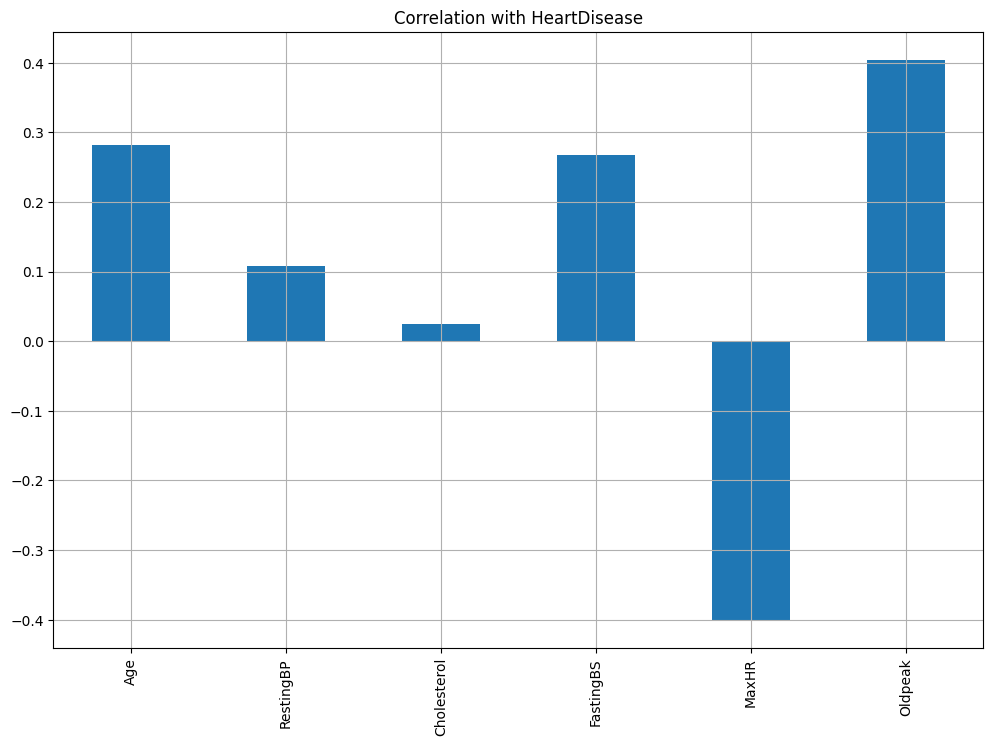

In [ ]:
x3.corrwith(y3).plot(kind='bar', grid=True, figsize=(12,8), title='Correlation with HeartDisease')

In [ ]:
df.corr()

<ipython-input-135-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399     0.014352   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.090303   0.070193 -0.112135  0.164803   
Cholesterol   0.014352   0.090303     1.000000   0.014725  0.055747  0.062005   
FastingBS     0.198039   0.070193     0.014725   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.055747  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.062005   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589     0.024106   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol       0.024106  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

**use data standarization in ML:**

In [ ]:
LR_model.fit(X_train2, y_train2)

LogisticRegression()

In [ ]:
y_train_pred2 = LR_model.predict(X_train2)
y_test_pred2 = LR_model.predict(X_test2)
train_accuracy2 = accuracy_score(y_train2, y_train_pred2)
test_accuracy2 = accuracy_score(y_test2, y_test_pred2)
confusion_mat2 = confusion_matrix(y_test2, y_test_pred2)
class_report2 = classification_report(y_test2, y_test_pred2)


print("Train Accuracy Score:", train_accuracy2)
print("Test Accuracy Score:\n", test_accuracy2)
print("Confusion Matrix:\n", confusion_mat2)
print("Classification Report:\n", class_report2)

Train Accuracy Score: 0.8666666666666667
Test Accuracy Score:
 0.858085808580858
Confusion Matrix:
 [[111  12]
 [ 31 149]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       123
           1       0.93      0.83      0.87       180

    accuracy                           0.86       303
   macro avg       0.85      0.87      0.86       303
weighted avg       0.87      0.86      0.86       303



<Axes: >

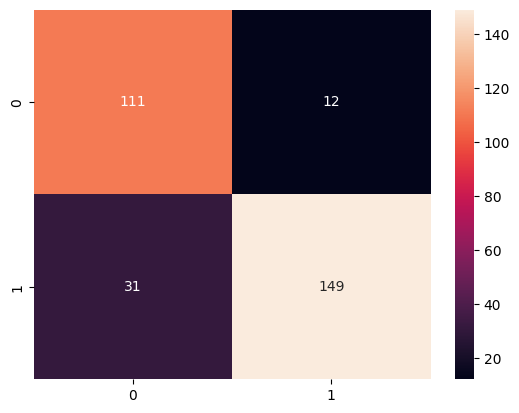

In [ ]:
sns.heatmap(confusion_mat2, annot=True, fmt='d')

# **Conclusion:**

*   I success to predict Heart Failure with accuracy 86% by using LogisticRegression which is best accuracy for my experiment.
*   I use a lot of steps:

    1.   Bussiness & Data Understanding.
    2.   Load & show Data.
    3.   Explore Data.
    4.   EDA and Extract Insights.
    5.   Data Preprocessing.
            *   Handle zero rows.
            *   Convert Categorical Features to Numerical.
            *   Scalling Data.
            *   split Data.
    6.   Applay Machine Learning algorithms to predict Heart Failure.







# **Observations & Recommendations:**

> **Observation for Categorical Features:**
*   **Sex:** **"Male"** is more likely to have heart disease than Female.
*   **ChestPainType:** People have type **"ASY"** are more likely to have heart disease than people have other Types, then "NAP".
*   **FastingBS:** people have **"BS < 120"** are sometimes have heart disease and another sometimes have not. and most of people have **BS > 120** also have heart disease.
*   **RestingECG:** people have **"Normal"** type are more likely to have heart disease, then "ST", finally "LVH".
*   **ExerciseAngina:** Most people have Angina **"Yes"** have heart disease.
*   **ST_Slop:** **"Flat"** slope display a very high probability of being diagnosed with heart disease, then "Up", then "Down".











> **Observation for Numerical Features:**
*   **Age:** people have **"54+"** are more likely to have heart disease.
*   **RestingBP:** Most values overlapping, but values in range **"135 <"** have high probability of being diagnosed with heart disease.
*   **Cholesterol:** zero values it effect on results and it does not make sense,so i will handle it in preprocessig step, but values in range **"280 <"** have high probability of being diagnosed with heart disease.
*   **MaxHR:** people have MaxHR in range **"90:149"** have high probability of being diagnosed with heart disease.
*   **Oldpeak:** Most values display Heart disease, but values in range **"1<"** display high probability being diagnosed with heart disease.











> Recommendations:
*   Depending on observation from Chest Pain Type that "ASY" type is the most.
        The patient how have this type does not feel any pain, that is appear only in medical examinations,so I recommend that the patient make checkup frequantly.
*   Depending on observation from Age, RestingBP, Cholesterol and FastingBS columns.
        People have age 54+, i recommend They are trying to make pressure, sugar and cholesterol not go beyond the normal limit.
*   Depending on observation from MaxHR column.
        people must take care of their Max Heart Rate that not go beyond 90.

